<a href="https://colab.research.google.com/github/blazaropinto/portfolio_PDA_Data_Science/blob/main/Data_Investigation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data investigation project
---

Use what you have learnt so far about reading data files and displaying rows, columns, unique values, etc, to investigate and produce some printed information from this data set: https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/housing_in_london_yearly_variables.csv

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/housing_in_london_yearly_variables.csv'
df = pd.read_csv(url)
df.head(3)

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1


##### Look at the main information on the dataframe

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   date               1071 non-null   object 
 3   median_salary      1049 non-null   float64
 4   life_satisfaction  352 non-null    float64
 5   mean_salary        1071 non-null   object 
 6   recycling_pct      860 non-null    object 
 7   population_size    1018 non-null   float64
 8   number_of_jobs     931 non-null    float64
 9   area_size          666 non-null    float64
 10  no_of_houses       666 non-null    float64
 11  borough_flag       1071 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 100.5+ KB


##### Functions, dtypes and new columns

* Create a function to get a list of the unique values and its length, as a tuple, for the column passed as an argument. 

* Then use it to print the number of unique values and the first 4 values for each column of the dataframe only in case the number of unique values is less than 3% of the records in the dataframe.

In [39]:
def col_unique_values(col):
  list_unique = df[col].unique()
  n_unique = len(list_unique)
  return list_unique, n_unique


for col in df.columns:
  value_tuple = col_unique_values(col)
  if value_tuple[1] < 0.03 * df.shape[0]:
    print('Column name', col, 'has', value_tuple[1], 'different values')
    for val in value_tuple[0][:4]:
      print(val) 
    print('\n')

Column name date has 21 different values
1999-12-01
2000-12-01
2001-12-01
2002-12-01


Column name borough_flag has 2 different values
1
0




* Convert the column borough_flag to category type and the date column to a to pandas date type  

In [40]:
df.borough_flag =df.borough_flag.astype('category')
df.date = pd.to_datetime(df.date)
df.dtypes

code                         object
area                         object
date                 datetime64[ns]
median_salary               float64
life_satisfaction           float64
mean_salary                  object
recycling_pct                object
population_size             float64
number_of_jobs              float64
area_size                   float64
no_of_houses                float64
borough_flag               category
dtype: object

* Create some more interesting columns

In [41]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df.head(3)

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,year,month
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1,1999,12
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1,1999,12
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1,1999,12


In [42]:
df['jobs_pp'] = df.number_of_jobs/df.population_size

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   code               1071 non-null   object        
 1   area               1071 non-null   object        
 2   date               1071 non-null   datetime64[ns]
 3   median_salary      1049 non-null   float64       
 4   life_satisfaction  352 non-null    float64       
 5   mean_salary        1071 non-null   object        
 6   recycling_pct      860 non-null    object        
 7   population_size    1018 non-null   float64       
 8   number_of_jobs     931 non-null    float64       
 9   area_size          666 non-null    float64       
 10  no_of_houses       666 non-null    float64       
 11  borough_flag       1071 non-null   category      
 12  year               1071 non-null   int64         
 13  month              1071 non-null   int64         
 14  jobs_pp 

* Check why the number of null values is higher in the new column than in those used to calculate it

In [44]:
df[~df.number_of_jobs.isna() & df.jobs_pp.isna()]

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,year,month,jobs_pp
953,E12000003,yorkshire and the humber,2017-12-01,26309.0,7.66,30484,42,NaN,2759000.0,NaN,NaN,0,2017,12,NaN
1004,E12000003,yorkshire and the humber,2018-12-01,26892.0,7.70,31719,43,NaN,2773000.0,NaN,NaN,0,2018,12,NaN


##### Get some statistics

In [45]:
df.describe()

,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses,year,month,jobs_pp
count,1049.000000,352.000000,1.018000e+03,9.310000e+02,6.660000e+02,6.660000e+02,1071.00000,1071.0,929.000000
mean,27977.792183,7.485057,6.042576e+06,3.188095e+06,3.724903e+05,8.814682e+05,2009.00000,12.0,1.687679
std,6412.807487,0.198451,1.526810e+07,8.058302e+06,2.157060e+06,3.690376e+06,6.05813,0.0,7.868843
min,15684.000000,7.000000,6.581000e+03,4.700000e+04,3.150000e+02,5.009000e+03,1999.00000,12.0,0.259833
25%,23857.000000,7.350000,2.243458e+05,9.450000e+04,2.960000e+03,8.763550e+04,2004.00000,12.0,0.395296
50%,27441.000000,7.510000,2.946035e+05,1.570000e+05,4.323000e+03,1.024020e+05,2009.00000,12.0,0.484218
75%,30932.000000,7.640000,4.630098e+06,2.217000e+06,8.220000e+03,1.262760e+05,2014.00000,12.0,0.541701
max,61636.000000,7.960000,6.643555e+07,3.575000e+07,1.330373e+07,2.417217e+07,2019.00000,12.0,81.787301


In [46]:
df.groupby(['code','area']).agg(
    {'median_salary': ['mean', 'median', 'min', 'max', 'skew'],
     'life_satisfaction': ['mean', 'median'],
     'population_size':	['mean', 'median', 'min', 'max'],
     'jobs_pp': 'mean',
     'area_size': 'mean',
     'no_of_houses': 'mean'}
).round(2)

median_salary  ... no_of_houses
                                            mean  ...         mean
code      area                                    ...             
E09000001 city of london                49237.14  ...      5605.39
E09000002 barking and dagenham          28218.19  ...     71064.72
E09000003 barnet                        27788.10  ...    139013.89
E09000004 bexley                        25633.00  ...     94658.17
E09000005 brent                         26254.67  ...    110228.78
E09000006 bromley                       24868.90  ...    133749.67
E09000007 camden                        33708.71  ...     98627.11
E09000008 croydon                       27425.57  ...    147543.89
E09000009 ealing                        27498.33  ...    126212.39
E09000010 enfield                       25890.38  ...    120216.83
E09000011 greenwich                     28010.05  ...    103006.22
E09000012 hackney                       30387.43  ...     99291.33
E09000013 hammersmith and fulham        32785.35  ...     81646.39
E09000014 haringey                      26727.57  ...    101831.22
E09000015 harrow                        26431.43  ...     85498.11
E09000016 havering                      25475.81  ...     98008.39
E09000017 hillingdon                    30596.19  ...    103707.17
E09000018 hounslow                      29801.67  ...     94132.72
E09000019 islington                     34685.90  ...     94089.17
E09000020 kensington and chelsea        28720.95  ...     85115.61
E09000021 kingston upon thames          26653.55  ...     64900.61
E09000022 lambeth                       31138.33  ...    129824.00
E09000023 lewisham                      28003.33  ...    116730.61
E09000024 merton                        26274.48  ...     81477.17
E09000025 newham                        27561.65  ...    102407.28
E09000026 redbridge                     27201.05  ...     99681.33
E09000027 richmond upon thames          29601.10  ...     81799.11
E09000028 southwark                     32841.57  ...    119891.72
E09000029 sutton                        25933.24  ...     79684.50
E09000030 tower hamlets                 41120.43  ...    100068.61
E09000031 waltham forest                25401.35  ...     97080.00
E09000032 wandsworth                    29185.10  ...    132366.39
E09000033 westminster                   35055.95  ...    114424.83
E12000001 north east                    22057.14  ...          NaN
E12000002 north west                    23101.14  ...          NaN
E12000003 yorkshire and the humber      22779.10  ...          NaN
E12000004 east midlands                 22796.29  ...          NaN
E12000005 west midlands                 23105.52  ...          NaN
E12000006 east                          24576.67  ...          NaN
E12000007 london                        32003.33  ...   3313582.39
E12000008 south east                    26163.33  ...          NaN
E12000009 south west                    23162.43  ...          NaN
E13000001 inner london                  37044.60  ...   1381919.28
E13000002 outer london                  28972.40  ...   1931663.33
E92000001 england                       25010.14  ...  22673573.22
K02000001 united kingdom                24683.52  ...          NaN
K03000001 great britain                 24766.57  ...          NaN
K04000001 england and wales             24858.00  ...          NaN
N92000002 northern ireland              22058.81  ...          NaN
S92000003 scotland                      23906.52  ...          NaN
W92000004 wales                         22149.10  ...          NaN

[51 rows x 14 columns]

We can see above that these data correspond to different levels of administrative areas, from regions of London to the whole United Kingdom

* Get the **interquartile range of population and jobs_pp** for the 4 countries in the United Kingdom



In [47]:
countries_UK = ['england', 'northern ireland', 'scotland', 'wales']

for area in countries_UK:
  print('    The IQR range of the population of', str(area).upper(), 
        'ranges from', round(df[df.area == area].population_size.quantile(0.25), 1),
         'to', str(round(df[df.area == area].population_size.quantile(0.75), 1)) \
        + '\n' + 'and its average ratio of jobs per person during the years 1999-2019 is',
        round(df[df.area == area].jobs_pp.mean(),3))

    The IQR range of the population of ENGLAND ranges from 50127329.2 to 53978517.2
and its average ratio of jobs per person during the years 1999-2019 is 0.519
    The IQR range of the population of NORTHERN IRELAND ranges from 1711762.5 to 1832418.2
and its average ratio of jobs per person during the years 1999-2019 is 0.47
    The IQR range of the population of SCOTLAND ranges from 5081212.5 to 5332675.0
and its average ratio of jobs per person during the years 1999-2019 is 0.512
    The IQR range of the population of WALES ranges from 2952496.8 to 3084818.0
and its average ratio of jobs per person during the years 1999-2019 is 0.452


##### Visualize the evolution along these years of median_salary,	life_satisfaction, no_of_houses and jobs_pp in the 4 countries

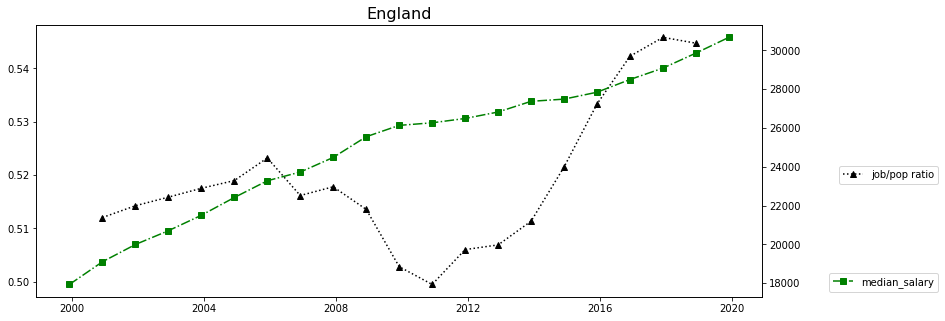

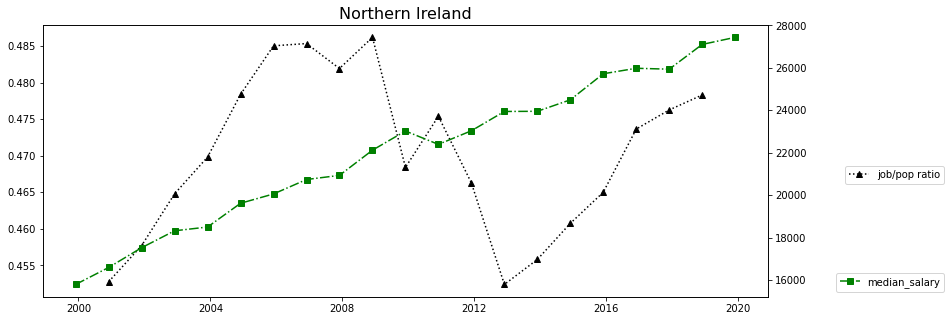

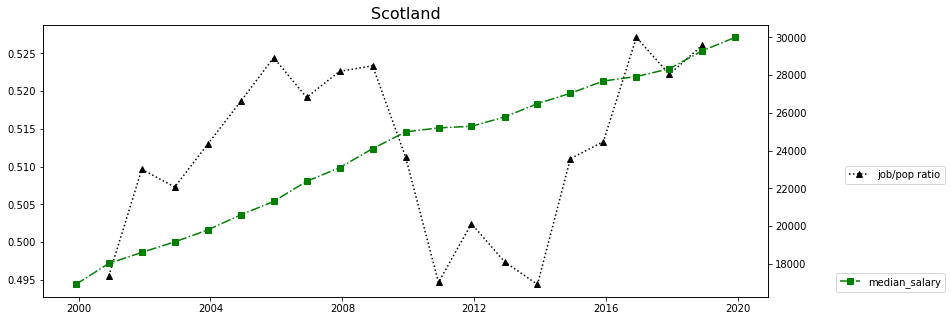

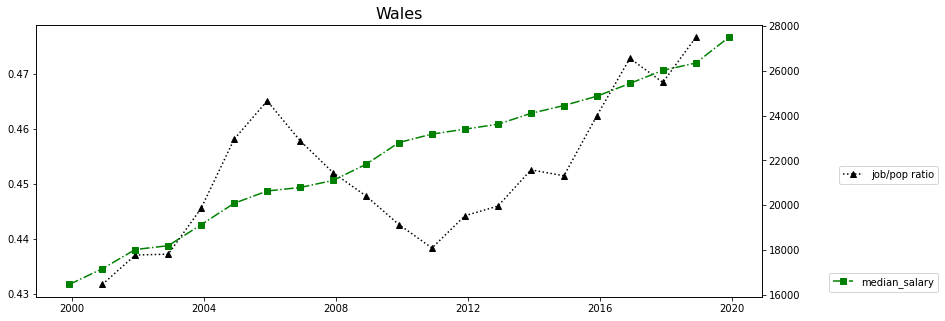

In [94]:
def create_evolution_graph(region, df):
  fig, ax = plt.subplots(figsize=(13,5))
  ax.plot(df.date, df['jobs_pp'], 'k^:', label='job/pop ratio')
  ax.legend(loc='upper right', bbox_to_anchor=(0.5, 0., 0.75, 0.5))
  ax2 = plt.twinx()
  ax2.plot(df.date, df['median_salary'], 'gs-.', label='median_salary')
  ax2.legend(loc='lower right', bbox_to_anchor=(0.5, 0., 0.75, 0.5))
  plt.title(region.title(), fontsize=16)
  plt.show()

for area in countries_UK:
  df_temp = df[df.area == area]
  create_evolution_graph(str(area), df_temp)